In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#LOADING DATA
df = pd.read_csv("Toddler_dataset.csv")

In [4]:
df1 = df.copy()

In [5]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [6]:
df.shape

(1054, 19)

In [7]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [9]:
#EXPLORATORY DATA ANALYSIS
df = df.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits ": "ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [10]:
df.isnull().mean() * 100

,0
Case_No,0.0
A1,0.0
A2,0.0
A3,0.0
A4,0.0
A5,0.0
A6,0.0
A7,0.0
A8,0.0
A9,0.0


In [11]:
df["ASD Traits"].value_counts()

,count
ASD Traits,
Yes,728
No,326


In [12]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed", "Others")
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("asian", "Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern", "Middle Eastern")
df["Ethnicity"] = df["Ethnicity"].replace("south asian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "African")

In [13]:
df["Ethnicity"].value_counts()

,count
Ethnicity,
White European,334
Other Asians,299
Middle Eastern,188
South Asian,63
African,53
Others,43
Hispanic,40
Latino,26
Pacifica,8


In [14]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [15]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [16]:
df["Who completed the test"].value_counts()

,count
Who completed the test,
Family Member,1018
Health Care Professional,29
Self,4
Others,3


In [17]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [18]:
df.iloc[:, 13:].head(1)

,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
0,f,Middle Eastern,yes,no,Family Member,No


In [19]:
for col in df.iloc[:, 13: ]:
    print(col,"\n", df[col].unique(), "\n")

Sex 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Family Member with ASD 
 ['no' 'yes'] 

Who completed the test 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

ASD Traits 
 ['No' 'Yes'] 



In [20]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


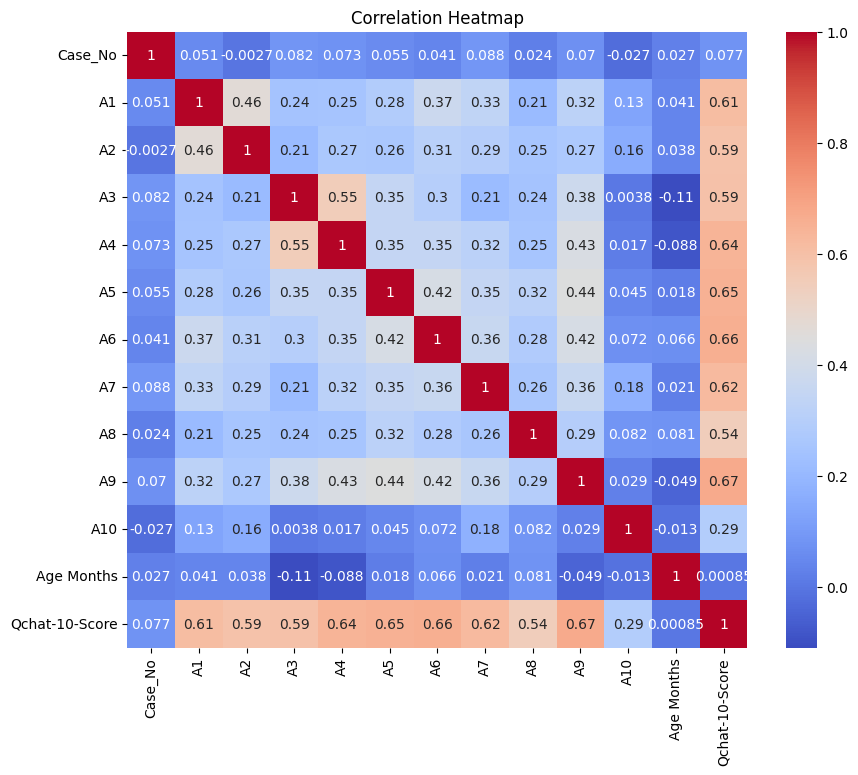

In [21]:
#DATA VISUALIZATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [22]:
#What Features from A1 to A10 contributes the most in ASD tarits?
df.iloc[:, 1:11].head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1


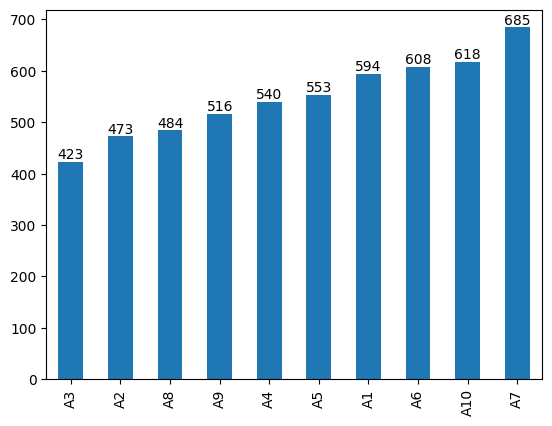

In [23]:
ax = df.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

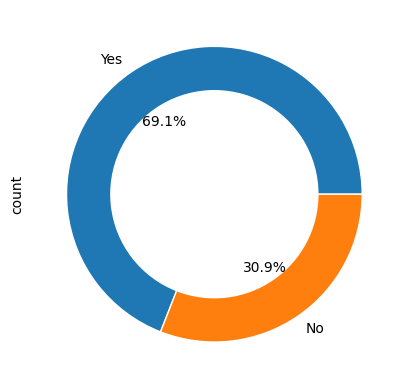

In [24]:
#ASD Traits
df["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));


In [25]:
#DATA PREPROCESSING
df1.drop(columns=["Case_No"], inplace=True)

In [26]:
mini = df1["Age_Mons"].min()
maxi = df1["Age_Mons"].max()
print(f"Minimum age {mini} and Maximum age {maxi}")

df1["Age"] = df1["Age_Mons"] / 12
df1.drop(columns=["Age_Mons"], inplace=True)

df1.head()

Minimum age 12 and Maximum age 36


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1.666667


In [27]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ']
df1 = df1[order]

df1.head()

df1.columns

df1["Class/ASD Traits "].unique()

df1["Class/ASD Traits "].value_counts()

,count
Class/ASD Traits,
Yes,728
No,326


In [28]:
#LABEL ENCODING
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df1["Jaundice"] = le.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"] = le.fit_transform(df1["Family_mem_with_ASD"])
df1["Class/ASD Traits "] = le.fit_transform(df1["Class/ASD Traits "])
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,White European,0,1,family member,1


In [29]:
#ONEHOT ENCODING
print(df1.columns)
df1 = pd.get_dummies(df1, columns=["Ethnicity", "Who completed the test"], drop_first=True)
df1.head()

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
1,1,1,0,0,0,1,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,0,1,1,1,1,1,1,1,...,True,False,False,False,False,False,False,False,False,True


In [30]:
df1.columns
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Ethnicity_Latino',
        'Ethnicity_Native Indian','Ethnicity_Others', 'Ethnicity_Pacifica',
        'Ethnicity_White European','Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits ']

df1 = df1[order]
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,True,0
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,True,1
2,1,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,True,1
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,1
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,1


In [31]:
#DATA SPLITTING
X = df1.drop(columns=["Class/ASD Traits "])
y = df1["Class/ASD Traits "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FEATURE SCALING
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



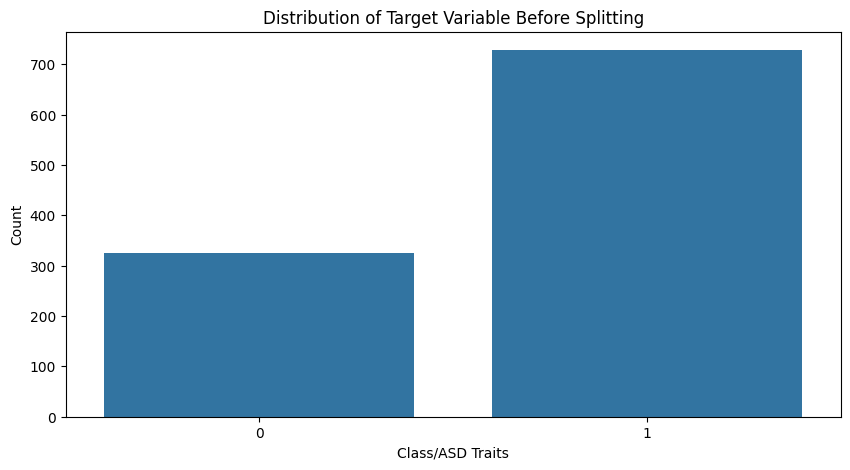

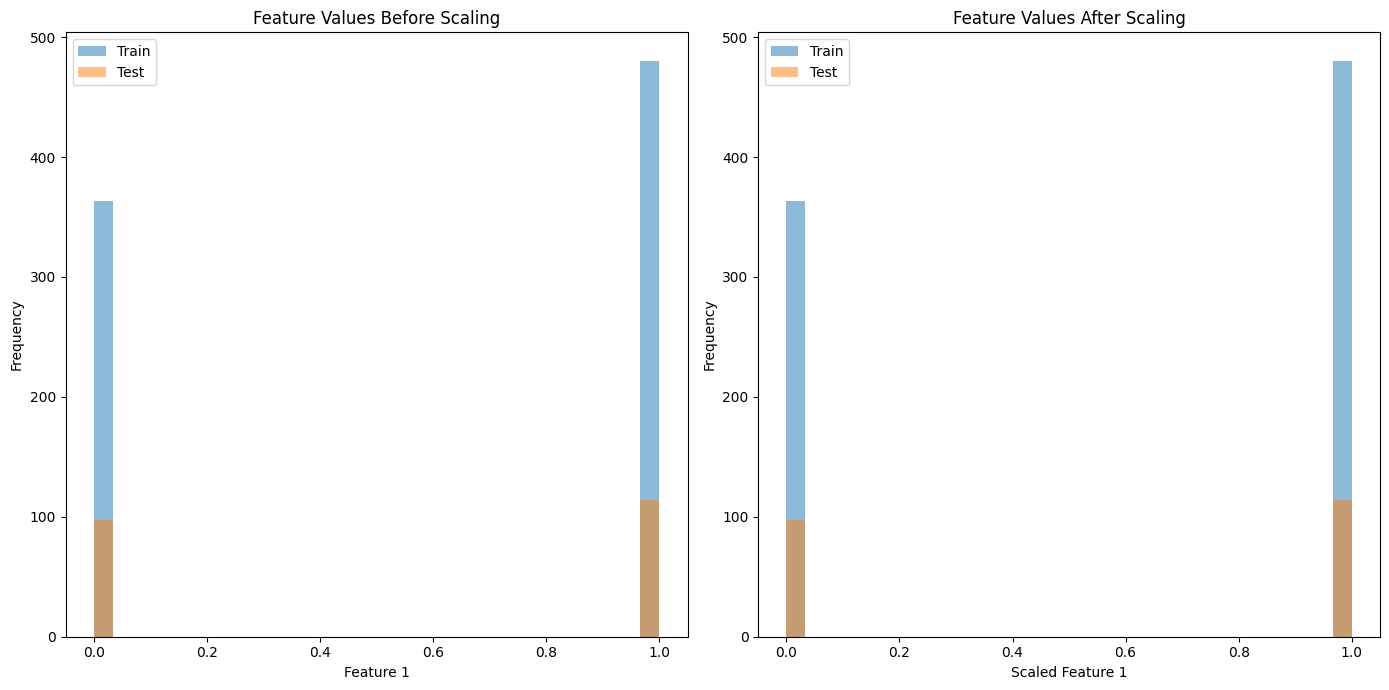

In [32]:
# Feature Scaling
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Plot the distribution of the target variable before splitting
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Distribution of Target Variable Before Splitting')
plt.xlabel('Class/ASD Traits')
plt.ylabel('Count')
plt.show()

# Plot the feature values before scaling (using the first feature as an example)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(X_train.iloc[:, 0], bins=30, alpha=0.5, label='Train')
plt.hist(X_test.iloc[:, 0], bins=30, alpha=0.5, label='Test')
plt.title('Feature Values Before Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.legend()

# Plot the feature values after scaling (using the first feature as an example)
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=30, alpha=0.5, label='Train')
plt.hist(X_test_scaled[:, 0], bins=30, alpha=0.5, label='Test')
plt.title('Feature Values After Scaling')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
#MODEL BUILDING
def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

In [34]:
#LOGISTIC Regression

model = LogisticRegression()

results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

results.index = ["Logistic Regression"]
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


In [35]:
#DECISION TREE CLASSIFIER

model = DecisionTreeClassifier()
decision_tree_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
decision_tree_results.index = ["Decision Tree Classifier"]

results = pd.concat([results, decision_tree_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0


In [36]:
#ENSEMBLE TECHNIQUES

# RandomForestClassifier

model = RandomForestClassifier()
random_forest_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

random_forest_results.index = ["Random Forest Classifier"]

results = pd.concat([results, random_forest_results])
results


,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0


In [37]:
# GradientBoostingClassifier

model = GradientBoostingClassifier()
gradiet_boosting_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

gradiet_boosting_results.index = ["Gradient Boosting Classifier"]

results = pd.concat([results, gradiet_boosting_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0
Gradient Boosting Classifier,1.0,1.0,1.0,1.0


In [38]:
# AdaBoostClassifier

model = AdaBoostClassifier()
ada_boost_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

ada_boost_results.index = ["Ada Boost Classifier"]

results = pd.concat([results, ada_boost_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree Classifier,1.0,1.0,1.0,1.0
Random Forest Classifier,1.0,1.0,1.0,1.0
Gradient Boosting Classifier,1.0,1.0,1.0,1.0
Ada Boost Classifier,1.0,1.0,1.0,1.0


In [39]:
#SUPPORT VECTOR MACHINE

model = SVC()
svm_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

svm_results.index = ["SVM Classifier"]

results = pd.concat([results, svm_results])
results


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.985782,0.992908,0.985915,0.989399


In [40]:
#K-NEIGHBORS

model = KNeighborsClassifier()
knn_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

knn_results.index = ["KNeighbors Classifier"]

results = pd.concat([results, knn_results])
results

,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000
Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.985782,0.992908,0.985915,0.989399
KNeighbors Classifier,0.971564,1.000000,0.957746,0.978417


In [41]:
results = results.T
results.shape


(4, 7)

In [42]:
results

,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,Ada Boost Classifier,SVM Classifier,KNeighbors Classifier
accuracy,1.0,1.0,1.0,1.0,1.0,0.985782,0.971564
precision,1.0,1.0,1.0,1.0,1.0,0.992908,1.000000
recall,1.0,1.0,1.0,1.0,1.0,0.985915,0.957746
f1,1.0,1.0,1.0,1.0,1.0,0.989399,0.978417


Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8051 - loss: 0.5996 - val_accuracy: 0.8225 - val_loss: 0.4046
Epoch 2/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.3647 - val_accuracy: 0.9527 - val_loss: 0.2288
Epoch 3/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.2029 - val_accuracy: 0.9645 - val_loss: 0.1471
Epoch 4/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1378 - val_accuracy: 0.9704 - val_loss: 0.1148
Epoch 5/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.1046 - val_accuracy: 0.9586 - val_loss: 0.0973
Epoch 6/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0866 - val_accuracy: 0.9704 - val_loss: 0.0839
Epoch 7/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0690 - val_accuracy: 0.9763 - val_loss: 0.0710
Epoch 8/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0543 - val_accuracy: 0.9763 - val_loss: 0.0625
Epo

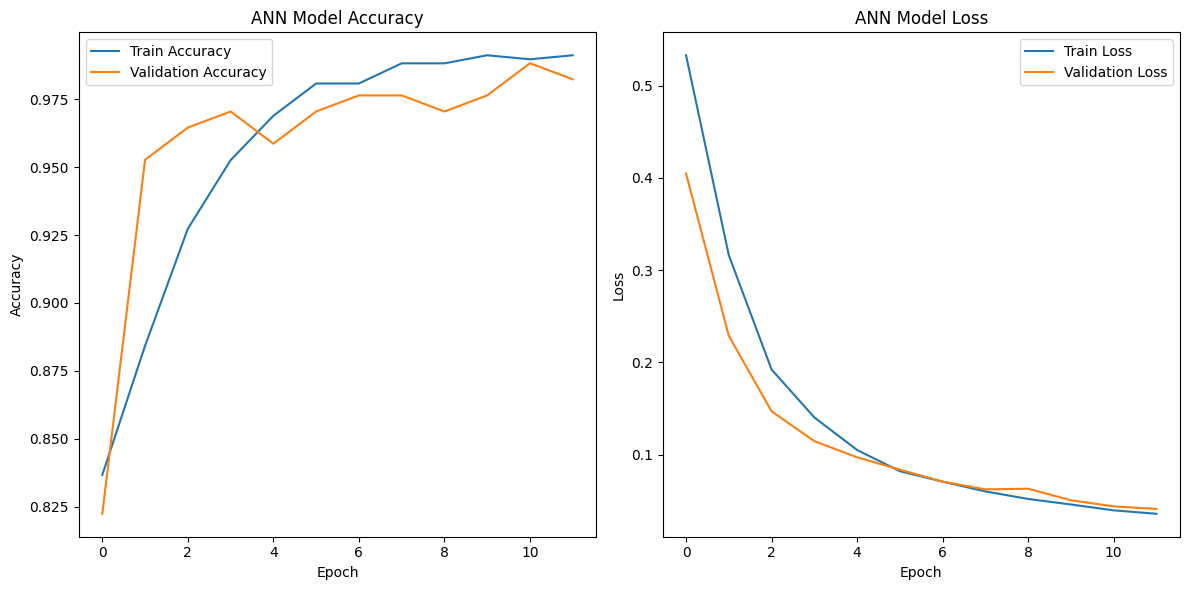

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to train and evaluate models
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    return pd.DataFrame({
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy]
    })

# ANN Model Training and Evaluation

# ANN Model
ann_model = Sequential()
ann_model.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense(16, activation="relu"))
ann_model.add(Dense(1, activation="sigmoid"))

ann_model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

ann_callback = EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10, verbose=1, mode="auto", restore_best_weights=True)

ann_history = ann_model.fit(X_train_scaled, y_train, batch_size=10, epochs=12, validation_split=0.2, callbacks=[ann_callback])

# Evaluate the ANN model
ann_train_accuracy = ann_model.evaluate(X_train_scaled, y_train, verbose=0)[1]
ann_test_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)[1]

ann_results = pd.DataFrame({
    'Train Accuracy': [ann_train_accuracy],
    'Test Accuracy': [ann_test_accuracy]
})

ann_results.index = ["ANN Classifier"]
results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
results = pd.concat([results, ann_results])
print(ann_results)


# Plotting training history for ANN
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()





Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5847 - loss: 0.6608 - val_accuracy: 0.6982 - val_loss: 0.4383
Epoch 2/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7622 - loss: 0.3991 - val_accuracy: 0.9053 - val_loss: 0.2711
Epoch 3/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.2332 - val_accuracy: 0.9822 - val_loss: 0.1595
Epoch 4/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1628 - val_accuracy: 0.9822 - val_loss: 0.1142
Epoch 5/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9680 - loss: 0.1196 - val_accuracy: 0.9822 - val_loss: 0.0893
Epoch 6/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.0877 - val_accuracy: 0.9763 - val_loss: 0.0867
Epoch 7/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9834 - loss: 0.0768 - val_accuracy: 0.9822 - val_loss: 0.0673
Epoch 8/12
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0644 - val_accuracy: 0.9882 - val_loss: 0.0568
Epo

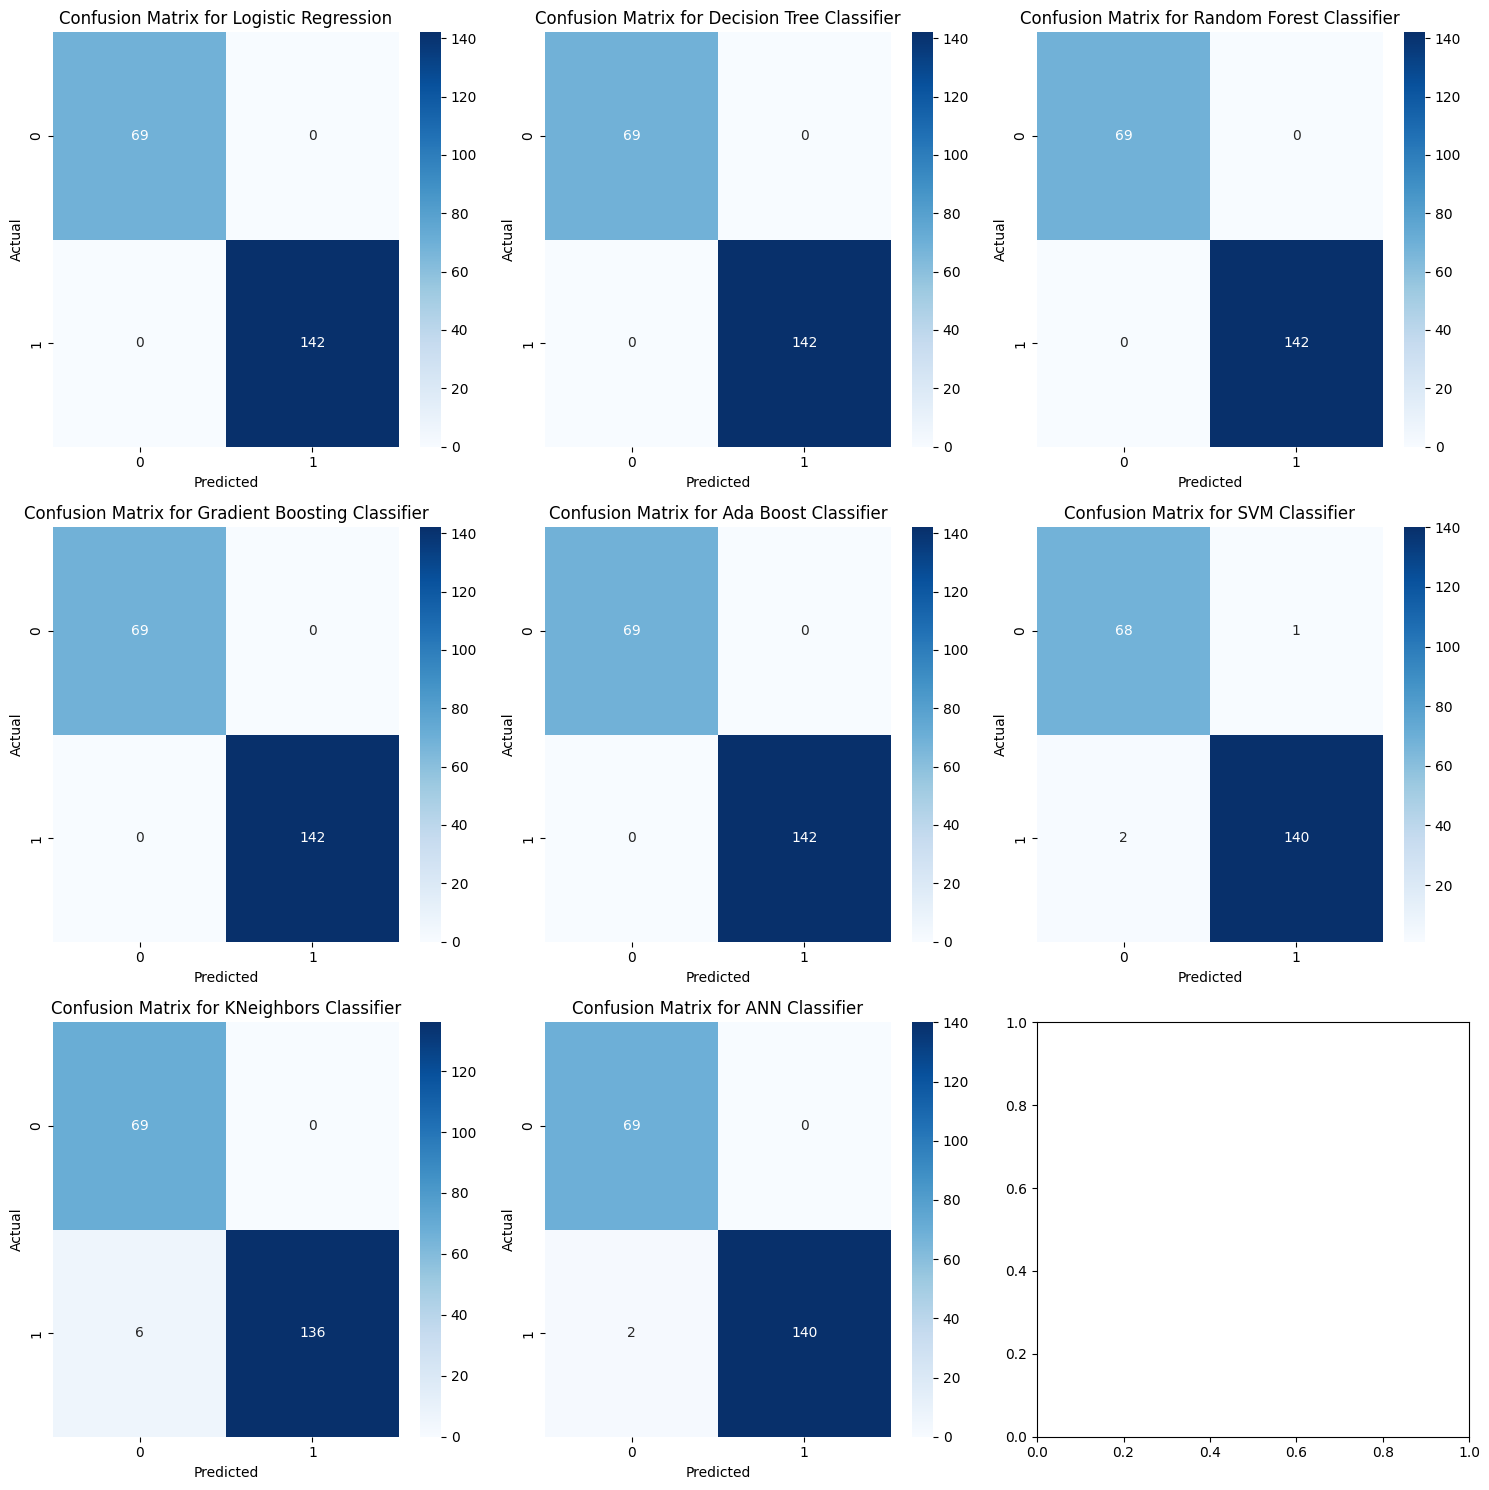

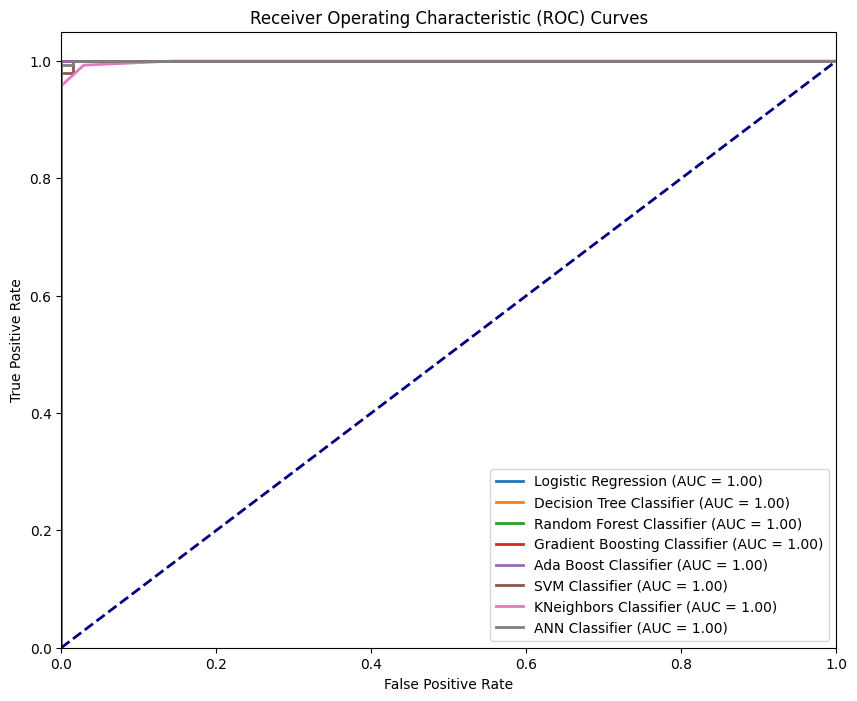

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

# Function to train and evaluate models
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    cm = confusion_matrix(y_test, y_pred_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    return pd.DataFrame({
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'AUC': [roc_auc]
    }), cm, (fpr, tpr, roc_auc)

# Assume X_train_scaled, y_train, X_test_scaled, y_test are your preprocessed datasets

# Initialize result containers
results = pd.DataFrame()
confusion_matrices = {}
roc_curves = {}

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "SVM Classifier": SVC(probability=True),
    "KNeighbors Classifier": KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model_results, cm, roc_curve_data = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    model_results.index = [model_name]
    results = pd.concat([results, model_results])
    confusion_matrices[model_name] = cm
    roc_curves[model_name] = roc_curve_data

# ANN Model Training and Evaluation
ann_model = Sequential()
ann_model.add(Dense(32, activation="relu", input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense(16, activation="relu"))
ann_model.add(Dense(1, activation="sigmoid"))

ann_model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

ann_callback = EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10, verbose=1, mode="auto", restore_best_weights=True)

ann_history = ann_model.fit(X_train_scaled, y_train, batch_size=10, epochs=12, validation_split=0.2, callbacks=[ann_callback])

# Evaluate the ANN model
ann_train_accuracy = ann_model.evaluate(X_train_scaled, y_train, verbose=0)[1]
ann_test_accuracy = ann_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
ann_precision = precision_score(y_test, (ann_model.predict(X_test_scaled) > 0.5).astype("int32"))
ann_recall = recall_score(y_test, (ann_model.predict(X_test_scaled) > 0.5).astype("int32"))
ann_f1 = f1_score(y_test, (ann_model.predict(X_test_scaled) > 0.5).astype("int32"))

ann_y_pred_prob = ann_model.predict(X_test_scaled).ravel()
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_y_pred_prob)
ann_roc_auc = auc(ann_fpr, ann_tpr)

ann_results = pd.DataFrame({
    'Train Accuracy': [ann_train_accuracy],
    'Test Accuracy': [ann_test_accuracy],
    'Precision': [ann_precision],
    'Recall': [ann_recall],
    'F1 Score': [ann_f1],
    'AUC': [ann_roc_auc]
})

ann_results.index = ["ANN Classifier"]
results = pd.concat([results, ann_results])

# Generate confusion matrix for ANN
ann_cm = confusion_matrix(y_test, (ann_model.predict(X_test_scaled) > 0.5).astype("int32"))
confusion_matrices['ANN Classifier'] = ann_cm
roc_curves['ANN Classifier'] = (ann_fpr, ann_tpr, ann_roc_auc)

# Display results
print(results)

# Function to plot confusion matrices
def plot_confusion_matrices(confusion_matrices):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()
    for i, (model_name, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(confusion_matrices)

# Function to plot ROC curves
def plot_roc_curves(roc_curves):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(roc_curves)
